In [15]:
import pandas as pd
import numpy as np

In [2]:
d = pd.read_csv('cleandata/train.csv')
d.shape

(307511, 754)

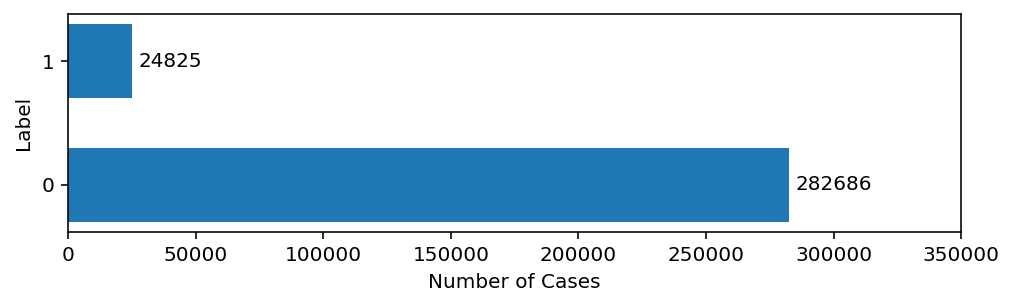

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 2), dpi=144)
count = len(d['TARGET'])
default = sum(d['TARGET'])
plt.barh(y = ['0','1'], height=0.6, width=[count-default, default])

plt.ylabel('Label')
plt.xlabel('Number of Cases')
plt.xlim(0,350000)
plt.text(300000, '0', round(count-default),verticalalignment='center', horizontalalignment='center', color='black')
plt.text(40000, '1', round(default),verticalalignment='center', horizontalalignment='center', color='black')
plt.savefig('plot/imbalanced_label.png',bbox_inches='tight')

In [57]:
col_list = list(d.columns)

feature_created = ['CREDIT_INCOME_PERCENT',
                   'ANNUITY_INCOME_PERCENT',
                   'CREDIT_TERM',
                   'INCOME_PER_PERSON',
                   'DAYS_EMPLOYED_PERCENT',
                   'AMT_ACCEPT_RATE',
                   'PAYMENT_PERCENT',
                   'PAYMENT_GAP',
                   'PAYMENT_TIME']

store = []
for n in col_list:
    for t in feature_created:
        if t in n:
            store.append(n)

In [58]:
store

['CREDIT_INCOME_PERCENT_APP',
 'CREDIT_TERM_APP',
 'INCOME_PER_PERSON_APP',
 'ANNUITY_INCOME_PERCENT_APP',
 'DAYS_EMPLOYED_PERCENT_APP',
 'AMT_ACCEPT_RATE_MIN_PREVAPP',
 'AMT_ACCEPT_RATE_MAX_PREVAPP',
 'AMT_ACCEPT_RATE_MEAN_PREVAPP',
 'AMT_ACCEPT_RATE_MIN_APPROVED_PREVAPP',
 'AMT_ACCEPT_RATE_MAX_APPROVED_PREVAPP',
 'AMT_ACCEPT_RATE_MEAN_APPROVED_PREVAPP',
 'AMT_ACCEPT_RATE_MIN_REJECT_PREVAPP',
 'AMT_ACCEPT_RATE_MAX_REJECT_PREVAPP',
 'AMT_ACCEPT_RATE_MEAN_REJECT_PREVAPP',
 'PAYMENT_PERCENT_MIN_REPAY',
 'PAYMENT_PERCENT_MAX_REPAY',
 'PAYMENT_PERCENT_MEAN_REPAY',
 'PAYMENT_GAP_MIN_REPAY',
 'PAYMENT_GAP_MAX_REPAY',
 'PAYMENT_GAP_MEAN_REPAY',
 'PAYMENT_GAP_SUM_REPAY',
 'PAYMENT_TIME_MIN_REPAY',
 'PAYMENT_TIME_MAX_REPAY',
 'PAYMENT_TIME_MEAN_REPAY',
 'PAYMENT_TIME_SUM_REPAY']

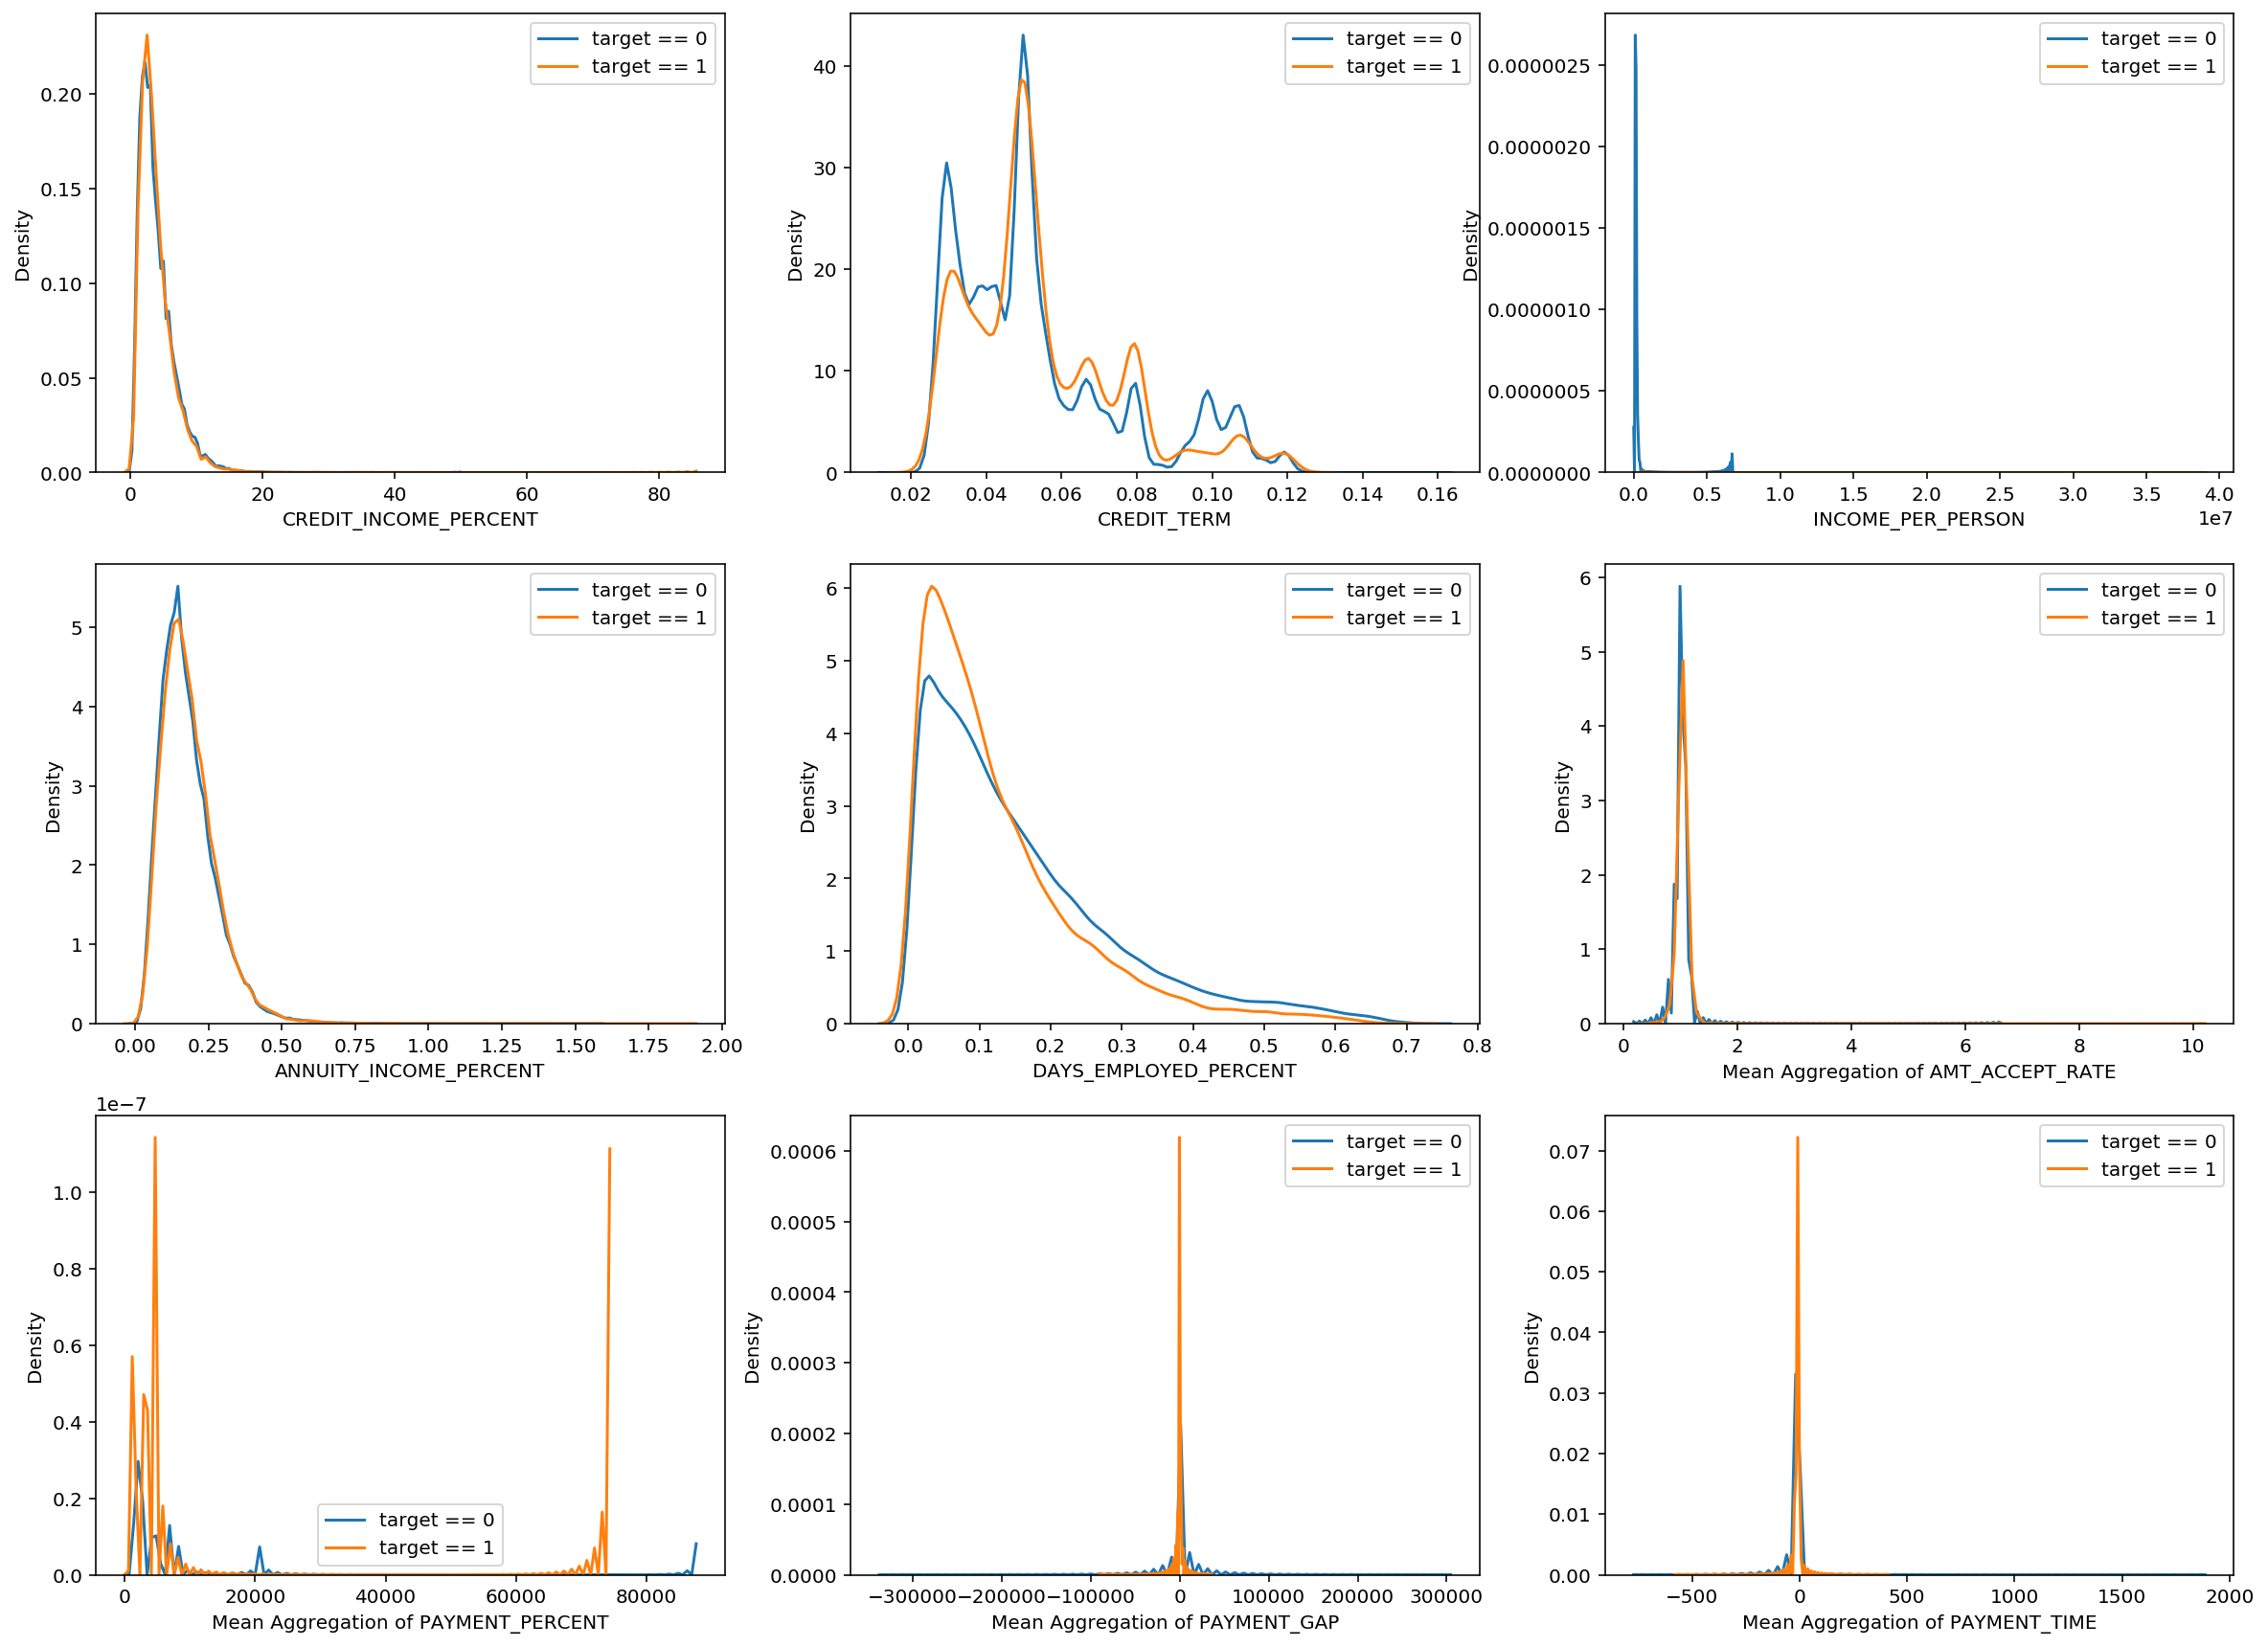

In [59]:
import seaborn as sns

plt_column = ['CREDIT_INCOME_PERCENT_APP',
              'CREDIT_TERM_APP',
              'INCOME_PER_PERSON_APP',
              'ANNUITY_INCOME_PERCENT_APP',
              'DAYS_EMPLOYED_PERCENT_APP',
              'AMT_ACCEPT_RATE_MEAN_PREVAPP',
              'PAYMENT_PERCENT_MEAN_REPAY',
              'PAYMENT_GAP_MEAN_REPAY',
              'PAYMENT_TIME_MEAN_REPAY']

label_name = ['CREDIT_INCOME_PERCENT',
              'CREDIT_TERM',
              'INCOME_PER_PERSON',
              'ANNUITY_INCOME_PERCENT',
              'DAYS_EMPLOYED_PERCENT',
              'Mean Aggregation of AMT_ACCEPT_RATE',
              'Mean Aggregation of PAYMENT_PERCENT',
              'Mean Aggregation of PAYMENT_GAP',
              'Mean Aggregation of PAYMENT_TIME']

plt.figure(figsize=(20, 15), dpi=144)

for i in range(9):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(d.loc[d['TARGET'] == 0, plt_column[i]], label = 'target == 0')
    sns.kdeplot(d.loc[d['TARGET'] == 1, plt_column[i]], label = 'target == 1')
    plt.xlabel(label_name[i])
    plt.ylabel('Density')

plt.savefig('plot/feature_density.png')

In [5]:
cluster_name = []
for i in range(7):
    cluster_name.append('CLUSTER_'+str(i)+'_APP')
    
cluster_name.append('TARGET')
cluster_name.append('DAYS_BIRTH_APP')
cluster_name.append('CREDIT_INCOME_PERCENT_APP')
cluster_name.append('ANNUITY_INCOME_PERCENT_APP')

In [6]:
d_cluster = d[cluster_name].copy()

In [7]:
d_cluster['CLUSTER'] = 7

for i in range(7):
    name = 'CLUSTER_'+str(i)+'_APP'
    d_cluster.loc[d_cluster[name]==1,'CLUSTER'] = i

In [8]:
d_cluster['CLUSTER'].value_counts()

6    56442
0    53549
4    50701
3    48448
1    45168
7    26726
5    19962
2     6515
Name: CLUSTER, dtype: int64

In [9]:
a = d_cluster.groupby('CLUSTER').agg({'DAYS_BIRTH_APP': ['mean'],'CREDIT_INCOME_PERCENT_APP':['mean'],'ANNUITY_INCOME_PERCENT_APP':['mean']})
a.columns = [n[0].upper()+'_'+n[1].upper() for n in a.columns.tolist()]
a = a.reset_index()
a['DAYS_BIRTH_APP_MEAN'] = a['DAYS_BIRTH_APP_MEAN']/(-365.25)
a

,CLUSTER,DAYS_BIRTH_APP_MEAN,CREDIT_INCOME_PERCENT_APP_MEAN,ANNUITY_INCOME_PERCENT_APP_MEAN
0,0,33.932843,4.054143,0.202165
1,1,59.015819,2.268252,0.118638
2,2,47.117251,13.290044,0.485408
3,3,54.578888,4.805151,0.210818
4,4,30.010438,1.865651,0.105918
5,5,55.483346,8.199517,0.314048
6,6,43.853069,2.286304,0.115609
7,7,36.057724,7.137297,0.296068


In [10]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scale.fit(d_cluster[['DAYS_BIRTH_APP','CREDIT_INCOME_PERCENT_APP','ANNUITY_INCOME_PERCENT_APP']])
scale_results = scale.transform(d_cluster[['DAYS_BIRTH_APP','CREDIT_INCOME_PERCENT_APP','ANNUITY_INCOME_PERCENT_APP']])

In [11]:
d_cluster['DAYS_BIRTH_S'] = scale_results[:,0]
d_cluster['CREDIT_INCOME_PERCENT_S'] = scale_results[:,1]
d_cluster['ANNUITY_INCOME_PERCENT_S'] = scale_results[:,2]

In [78]:
from sklearn.manifold import TSNE
tsne_model = TSNE()
tsne_model.fit_transform(d_cluster[['DAYS_BIRTH_S', 'CREDIT_INCOME_PERCENT_S', 'ANNUITY_INCOME_PERCENT_S']])

NameError: name 'data' is not defined

8


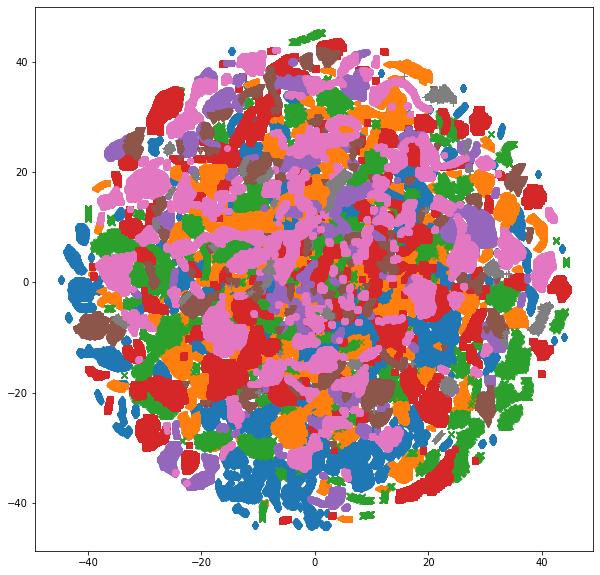

In [79]:
data_tsne = pd.DataFrame(tsne_model.embedding_, index=d_cluster.index)
data_tsne['cluster'] = d_cluster['CLUSTER']
    
cluster = data_tsne['cluster'].unique().tolist()
print(len(cluster))
shapemap = {0:'o', 1:'x', 2:'+', 3:'s', 4:'d', 5:'v', 6:'<', 7:'o'}
    
plt.figure(figsize=(10,10))
for n in cluster:
    clusterselect = data_tsne[data_tsne['cluster'] == n]
    plt.plot(clusterselect[0], clusterselect[1], shapemap[n])

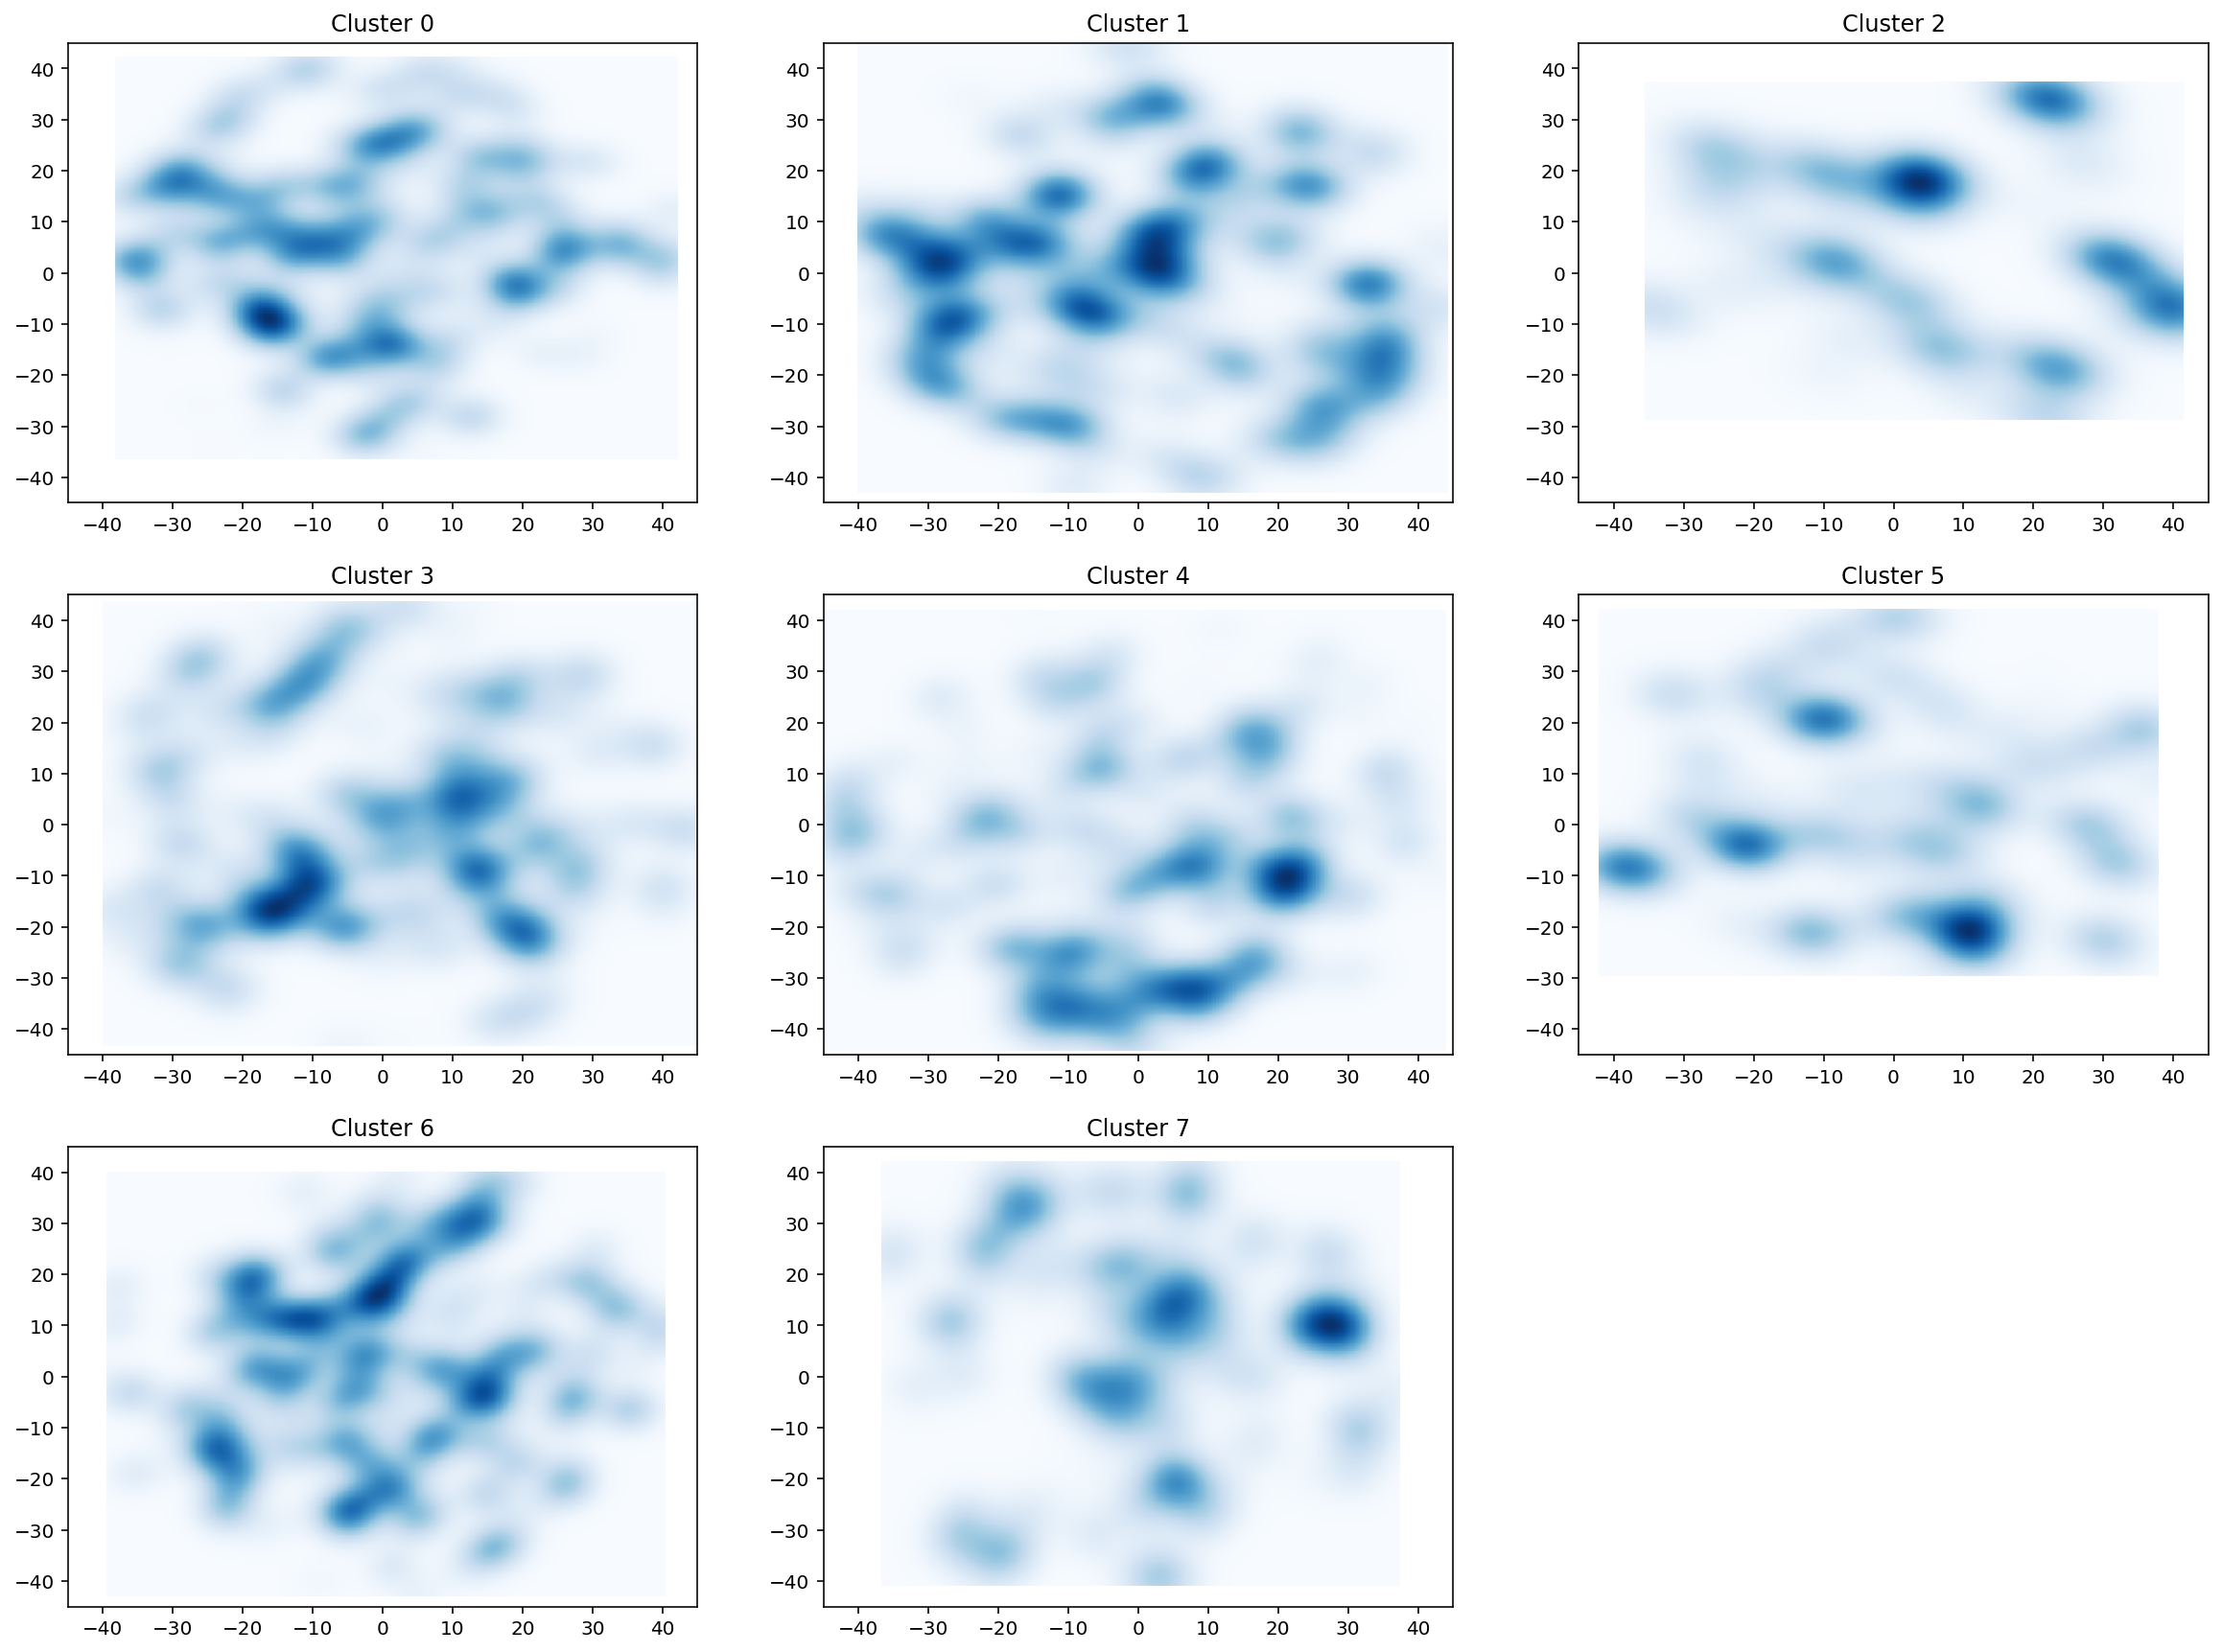

In [94]:
plt.figure(figsize=(20, 15), dpi=144)

for i in range(8):
    plt.subplot(3, 3, i+1)
    clusterselect = data_tsne[data_tsne['cluster'] == i]
    x = clusterselect[0]
    y = clusterselect[1]
    k = kde.gaussian_kde([x,y])
    xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
    zi = k(np.vstack([xi.flatten(), yi.flatten()]))
 
    # Make the plot
    plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues')
    plt.xlim(-45,45)
    plt.ylim(-45,45)
    plt.title('Cluster '+str(i))

plt.savefig('plot/tsne.png')

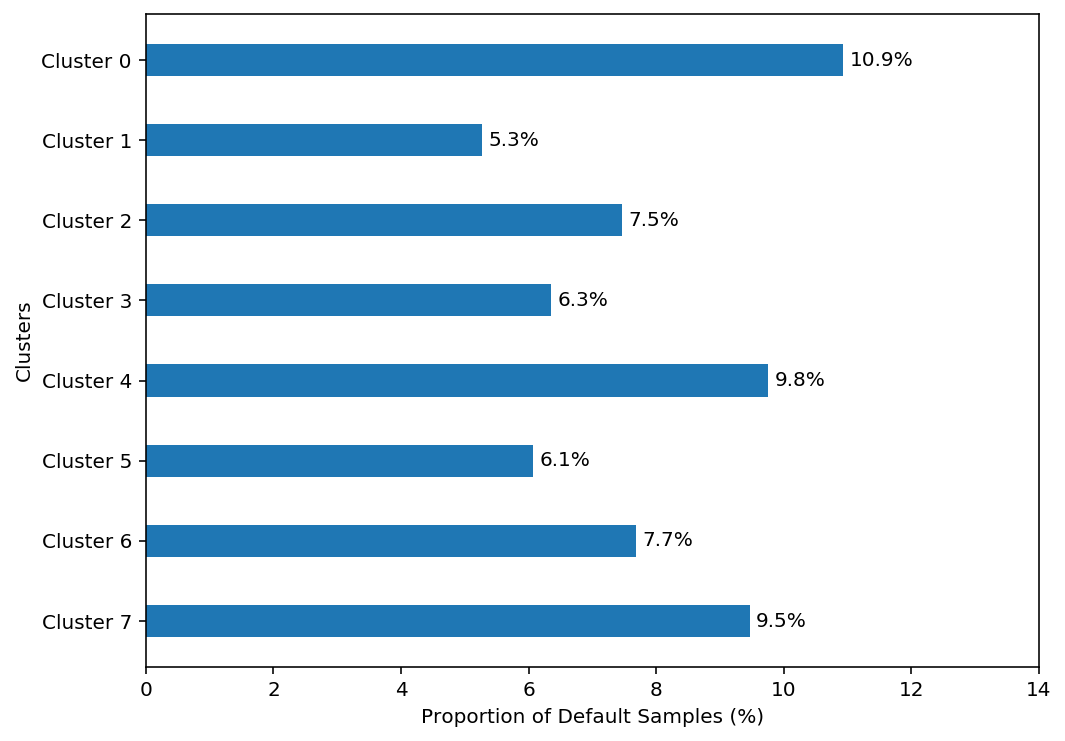

In [26]:
default_percent = list(d_cluster.groupby('CLUSTER')['TARGET'].mean().values)
default_percent = [v*100 for v in default_percent]
name = ['Cluster 0','Cluster 1','Cluster 2','Cluster 3','Cluster 4','Cluster 5','Cluster 6', 'Cluster 7']

plt.figure(figsize=(8, 6), dpi=144)
plt.barh(y = name[::-1], height=0.4, width=default_percent[::-1])
plt.xlabel('Proportion of Default Samples (%)')
plt.ylabel('Clusters')
plt.xlim(0,14)

for i in range(8):
    value = default_percent[7-i]
    plt.text(value+0.1, i, str(round(value,1))+'%',verticalalignment='center', color='black')
plt.savefig('plot/cluster_default_proportion.png')